In [116]:
# import packages
#import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [118]:
# Create a working directory
import os
print(os.getcwd())

# Set the working directory
os.chdir('/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication')

# list the name of variables located their
print(os.listdir())

/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication
['.DS_Store', 'anaconda_projects', 'LendingClub_Decision_Trees_Training_Set.xlsx', 'Logistic_Regression.ipynb', '.ipynb_checkpoints', 'Decision_trees.ipynb', '.git', 'LendingClub_Decision_Trees_Test_Set.xlsx', 'LendingClub_Decision_Trees_Validation_Set.xlsx']


In [120]:
# Load the dataset
train = pd.read_excel('/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication/LendingClub_Decision_Trees_Training_Set.xlsx')
validation=pd.read_excel('/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication/LendingClub_Decision_Trees_Validation_Set.xlsx')
test = pd.read_excel('/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication/LendingClub_Decision_Trees_Test_Set.xlsx')

In [121]:
# Note: 1: Good and 0= default
print(train.head())
print("--------------")
print(validation.head())
print("--------------")
print(test.head())
print("--------------")

#To check the name of the variables 
test.columns

   home_ownership    income    dti  fico  loan_status
0               1   44304.0  18.47   690            0
1               0   50000.0  29.62   735            1
2               0   64400.0  16.68   675            1
3               0   38500.0  33.73   660            0
4               1  118000.0  26.66   665            1
--------------
   home_ownership    income    dti  fico  loan_status
0               0   25000.0  27.60   660            0
1               0   50000.0  21.51   715            1
2               1  100000.0   8.14   770            1
3               0   75000.0   1.76   685            0
4               1   78000.0  16.11   680            1
--------------
   home_ownership    income    dti  fico  loan_status
0               1   52400.0  24.64   665            1
1               1  150000.0  17.04   785            1
2               1  100000.0  20.92   710            1
3               0   97000.0  13.11   705            1
4               1  100000.0  24.08   685            

Index(['home_ownership', 'income', 'dti', 'fico', 'loan_status'], dtype='object')

The data has already been split into training set, validation set and test set.

In [125]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status', axis=1)
X_val=validation.drop('loan_status', axis=1)
X_test = test.drop('loan_status', axis=1)

# Scale data using the mean and standard deviation of the training set. 
# This is not necessary for the simple logistic regression we will do here 
# but should be done if L1 or L2 regrularization is carried out
X_test=(X_test-X_train.mean())/X_train.std()
X_val=(X_val-X_train.mean())/X_train.std()
X_train=(X_train-X_train.mean())/X_train.std()

# store target column as y-variables 
y_train = train['loan_status']
y_val=validation['loan_status']
y_test = test['loan_status']

#print first five instances for each data set

print(X_train.head())
print("--------------------------------")
print(X_val.head())
print("--------------------------------")
print(X_test.head())

   home_ownership    income       dti      fico
0        0.809651 -0.556232  0.053102 -0.163701
1       -1.234923 -0.451393  1.307386  1.262539
2       -1.234923 -0.186349 -0.148259 -0.639114
3       -1.234923 -0.663060  1.769728 -1.114527
4        0.809651  0.800204  0.974410 -0.956056
--------------------------------
   home_ownership    income       dti      fico
0       -1.234923 -0.911538  1.080153 -1.114527
1       -1.234923 -0.451393  0.395077  0.628655
2        0.809651  0.468899 -1.108940  2.371837
3       -1.234923  0.008753 -1.826638 -0.322172
4        0.809651  0.063971 -0.212379 -0.480643
--------------------------------
   home_ownership    income       dti      fico
0        0.809651 -0.407219  0.747177 -0.956056
1        0.809651  1.389190 -0.107762  2.847250
2        0.809651  0.468899  0.328707  0.470184
3       -1.234923  0.413681 -0.549855  0.311713
4        0.809651  0.468899  0.684181 -0.322172


In [127]:
print(X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape)
X_train.columns

(7000, 4) (7000,) (3000, 4) (3000,) (2290, 4) (2290,)


Index(['home_ownership', 'income', 'dti', 'fico'], dtype='object')

In [129]:
freq = y_train.value_counts()           # count frequency of different classes in training set
freq/sum(freq)*100                      # get percentage of above

loan_status
1    79.171429
0    20.828571
Name: count, dtype: float64

This shows that 79.17% do not default on their loan, whereas 20.82% actually default on their loan amount.

In [132]:
#Create an ionstance of logisticregression named lgstc_reg 

lgstc_reg =  LogisticRegression(penalty=None,solver="newton-cg")     # Penalty none mean no regularization

# Fit logististic regression to training set

lgstc_reg.fit(X_train, y_train)                                        # fit training data on logistic regression 


print(lgstc_reg.intercept_, lgstc_reg.coef_)     # get the coefficients of each features

[1.41622043] [[ 0.14529381  0.03361951 -0.32404237  0.363174  ]]


These results show that we have a bias of 1.416 and coefficients are 0.145, 0.034, -0.32, and 0.363, respectively, for the 4 features.
Now we will test the model with the validation set.

In [135]:
print(X_train.columns)
print(X_val.columns)

Index(['home_ownership', 'income', 'dti', 'fico'], dtype='object')
Index(['home_ownership', 'income', 'dti', 'fico'], dtype='object')


In [137]:
# y_train_pred, y_val_pred, and y_test_pred are the predicted probabilities for the training set
# validation set and test set using the fitted logistic regression model

y_train_pred=lgstc_reg.predict_proba(X_train)
y_val_pred=lgstc_reg.predict_proba(X_val)
y_test_pred=lgstc_reg.predict_proba(X_test)

# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val=np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test=np.negative(np.sum(mle_vector_test)/len(y_test))

print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)

cost function training set = 0.4911114356066864
cost function validation set = 0.48607087962794676
cost function test set = 0.48466984479475056


An analyst must decide on a criterion for predicting whether loan will be good or default. This involves specifying a threshold By default this threshold is set to 0.5, i.e., loans are separated into good and bad categories according to whether the probability of no default is greater or less than 0.5. However this does not work well for an imbalanced data set such as this. It would predict that all loans are good! We will look at the results for few other thresholds.

Note: Cost function refer to the MSE which measures the difference between predicted probabilities and actual class labels.

In [143]:
# Setting the loan default  across various threshold level
THRESHOLD = [.75, .80, .85]
# Create dataframe to store resultd
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the 3 thresholds

for i in THRESHOLD:                                                                                       
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(lgstc_reg.predict_proba(X_test)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                   # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)

Confusion matrix for threshold = 0.75
[[60.82969432 18.34061135]
 [11.70305677  9.12663755]]
 
Confusion matrix for threshold = 0.8
[[42.70742358 36.4628821 ]
 [ 6.4628821  14.36681223]]
 
Confusion matrix for threshold = 0.85
[[22.7510917  56.41921397]
 [ 3.01310044 17.81659389]]
 
ALL METRICS
                       0         1         2
THRESHOLD           0.75       0.8      0.85
accuracy        0.699563  0.570742  0.405677
true pos rate    0.76834  0.539437  0.287369
true neg rate   0.438155  0.689727  0.855346
false pos rate  0.561845  0.310273  0.144654
precision       0.838651  0.868561  0.883051
f-score         0.801957  0.665532  0.433625


This table shows that there is a trade off betwee the true positive rate and the false positive rate.
We can improve the percentage of good loans we identify only by increasing the percentage of bad that are misclassified. The receiver operating curve (ROC) captures this trade off by considering different thresholds.

There is a trade-off between identifying more good loans (high recall) and avoiding bad ones (low FPR).
	•	If you want to approve more good loans, you must tolerate more risk (more false positives).
	•	If you want to minimize bad approvals, you will sacrifice approving some good ones.

This is exactly what the ROC curve illustrates: the balance between TPR and FPR at different thresholds.

(Accuracy is highest at Z=0.75 but decreases as Z increases.)

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.6577663531841429


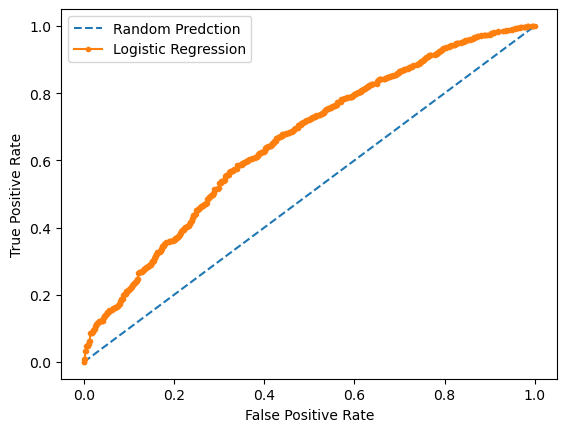

In [146]:
# Calculate the receiver operating curve and the AUC measure

lr_prob=lgstc_reg.predict_proba(X_test)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()